In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np

In [2]:
reviews = pd.read_csv("yelp_academic_dataset_review.csv")
businesses = pd.read_csv("yelp_academic_dataset_business.csv")

reviews = reviews.merge(businesses, how='left', on='business_id')
reviews = reviews[(reviews['city'] == 'Philadelphia') & (reviews['categories'].str.contains('Restaurants', na=False))]
reviews.reset_index(drop=True, inplace=True)
# reviews = reviews[['review_id', 'user_id', 'business_id', 'stars_x', 'text']]

reviews.head() 

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,PA,19114,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
1,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,Dmitri's,...,PA,19147,39.938013,-75.148131,4.0,273,0,"{'BusinessParking': ""{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30..."
2,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,LaScala's,...,PA,19106,39.949529,-75.152139,3.5,367,0,"{'RestaurantsReservations': 'True', 'BYOBCorka...","Pizza, Restaurants, Italian, Salad","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."
3,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5.0,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25,Rittenhouse Grill,...,PA,19103,39.948949,-75.169532,3.5,290,1,"{'RestaurantsAttire': ""u'dressy'"", 'Restaurant...","Wine Bars, Restaurants, Nightlife, Steakhouses...","{'Wednesday': '16:30-22:0', 'Thursday': '16:30..."
4,Xs8Z8lmKkosqW5mw_sVAoA,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27,Good Karma Cafe,...,PA,19107,39.944609,-75.157833,4.0,249,1,"{'Alcohol': ""u'none'"", 'RestaurantsReservation...","Food, Cafes, Coffee & Tea, Restaurants","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."


In [16]:
#prepare date
reviews['date'] = pd.to_datetime(reviews['date'])
ts = reviews.groupby(reviews['date'].dt.date).size().reset_index(name='count')
ts['date'] = pd.to_datetime(ts['date'])
ts.set_index('date', inplace=True)
monthly_reviews = ts.resample('M').sum().reset_index()
print(monthly_reviews)

          date  count
0   2005-02-28      1
1   2005-03-31      0
2   2005-04-30      0
3   2005-05-31      5
4   2005-06-30      9
..         ...    ...
199 2021-09-30   3260
200 2021-10-31   3367
201 2021-11-30   2811
202 2021-12-31   3110
203 2022-01-31   1849

[204 rows x 2 columns]


C:\Users\bmfs9\AppData\Local\Temp\ipykernel_15840\166029622.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = ts.resample('M').sum().reset_index()


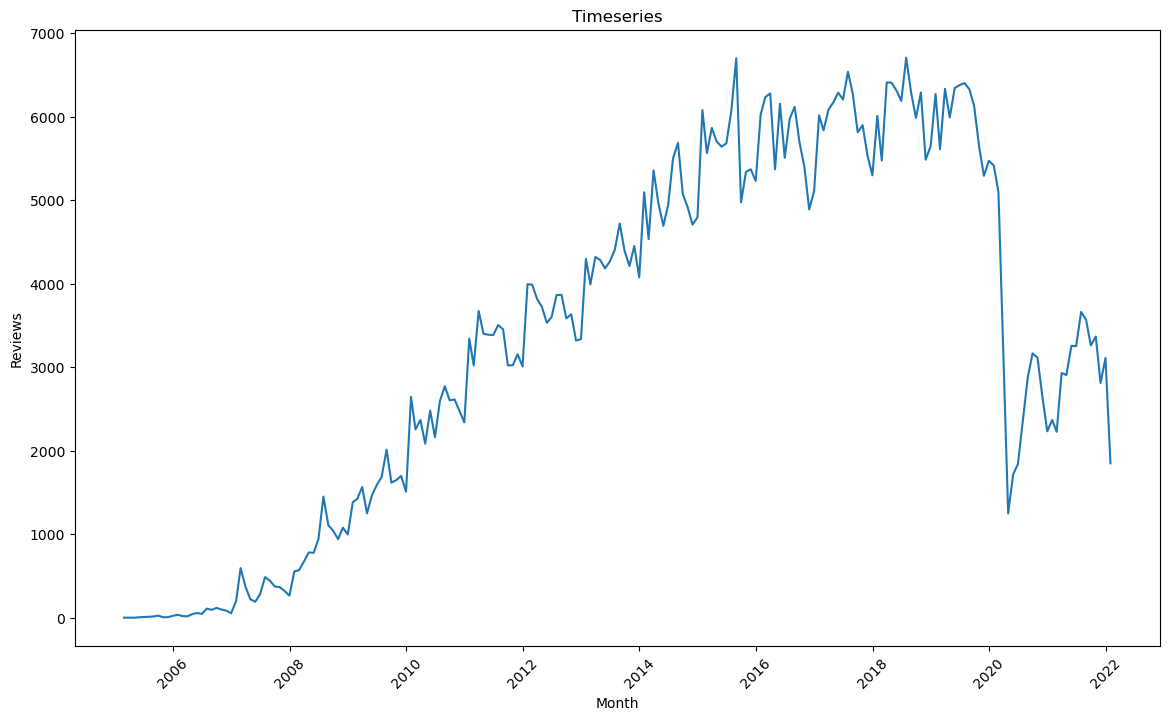

In [17]:
#plot
plt.figure(figsize=(14, 8))
plt.plot(monthly_reviews['date'], monthly_reviews['count'])  
plt.xlabel('Month')
plt.ylabel('Reviews')
plt.title('Timeseries')
plt.xticks(rotation=45)
plt.show()

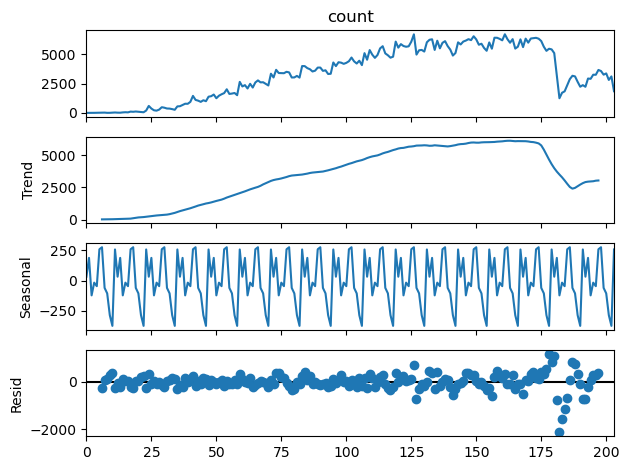

In [18]:
result = seasonal_decompose(monthly_reviews['count'], model='additive', period=12)
result.plot();

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


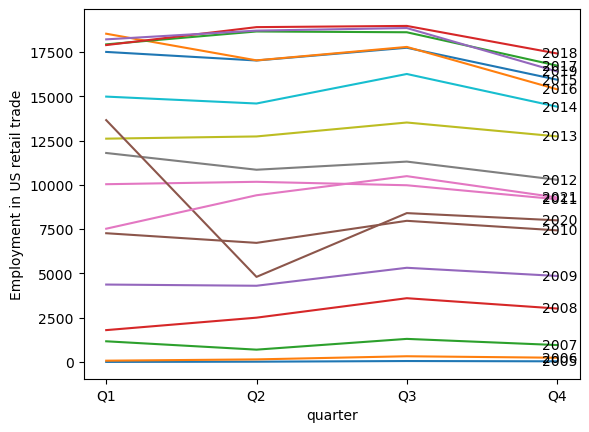

In [21]:
# create new dummy variables with the calendar dates
monthly_reviews['quarter'] = monthly_reviews['date'].dt.quarter
monthly_reviews['year'] = monthly_reviews['date'].dt.year

df_grouped = monthly_reviews.groupby(['quarter', 'year'])['count'].sum().unstack()
df_grouped.plot()

# change the axis label accordingly
plt.xticks(range(1,5), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.ylabel('Employment in US retail trade')

# remove the legend and add the year to the line
plt.legend().remove()
for year in monthly_reviews['year'].unique():
    plt.text(3.9, df_grouped.loc[4, year], year, va='center')

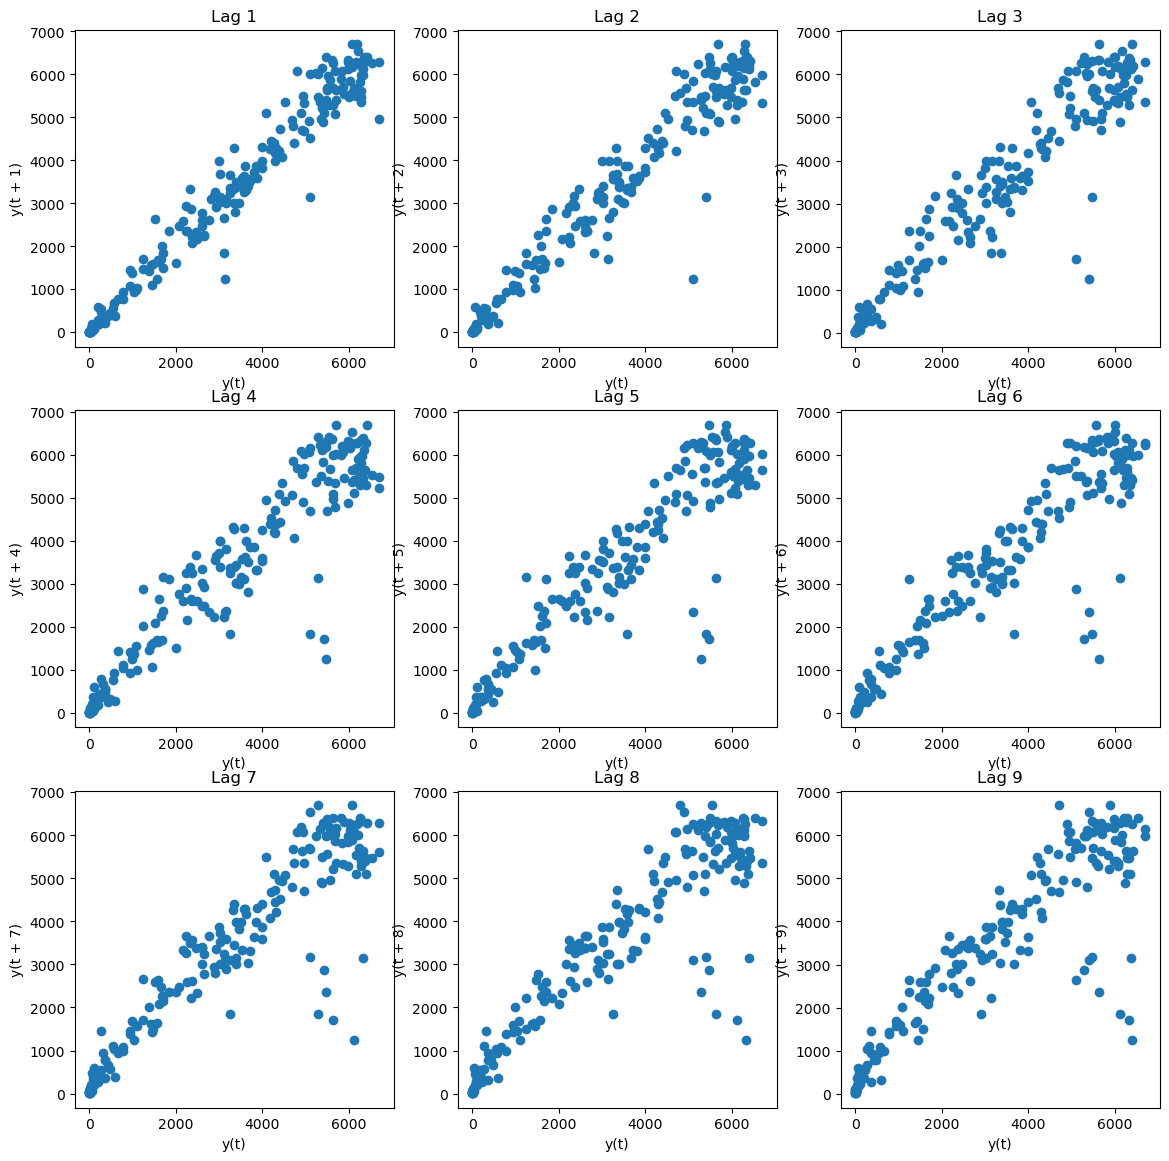

In [22]:
# NEED TO STUDY ; DO NOT KNOW HOW TO INTERPRET LAGGED PLOTS

_, axes = plt.subplots(3, 3, figsize=(14, 14))
for i, ax in enumerate(axes.flatten()):
    pd.plotting.lag_plot(monthly_reviews['count'], lag=i+1, ax=ax)
    ax.set_title(f"Lag {i+1}")

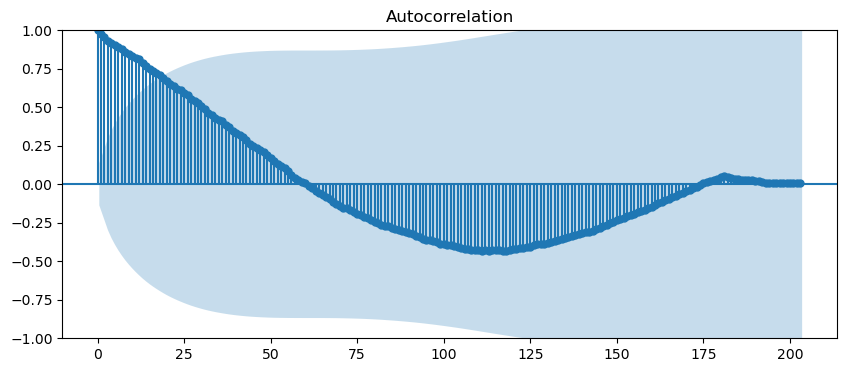

In [23]:
# ACF (autocorrelation )
_, ax = plt.subplots(figsize=(10,4), dpi= 100)
plot_acf(monthly_reviews['count'].tolist(), lags=203, ax=ax);

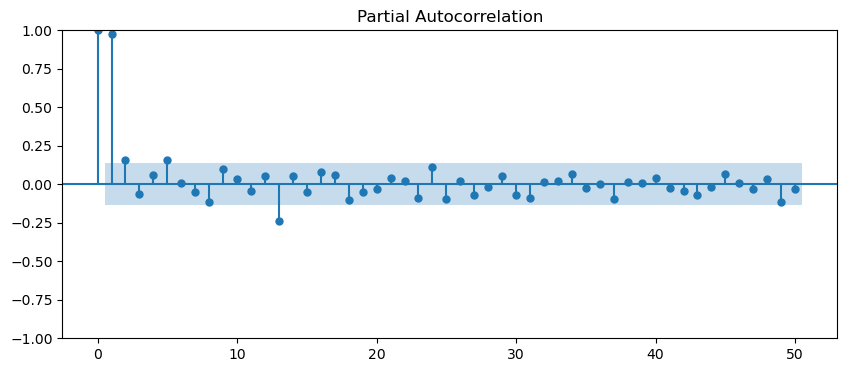

In [24]:
#Partial autocorrelation
_, ax = plt.subplots(figsize=(10,4), dpi= 100)
plot_pacf(monthly_reviews['count'].tolist(), lags=50, ax=ax);

In [25]:
# Augmented Dickey Fuller Test (ADF test)
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(monthly_reviews['count'], autolag="AIC")

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Critical Values: {adf_result[4]}')

#p-value of 0.47 means that the timeseries is not stationary

ADF Statistic: -1.6191187127475772
p-value: 0.4731913533390899
Critical Values: {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}


In [26]:
from statsmodels.tsa.stattools import kpss

kpss_result = kpss(monthly_reviews['count'], regression="c", nlags="auto")

print(f'KPSS Statistic: {kpss_result[0]}')
print(f'p-value: {kpss_result[1]}')
print(f'Critical Values: {kpss_result[3]}');

# On this test the hypothesis are opposite, so p<0.05 means that timeserie is not stationary

KPSS Statistic: 1.4843960125357374
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\bmfs9\AppData\Local\Temp\ipykernel_15840\4129881071.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(monthly_reviews['count'], regression="c", nlags="auto")


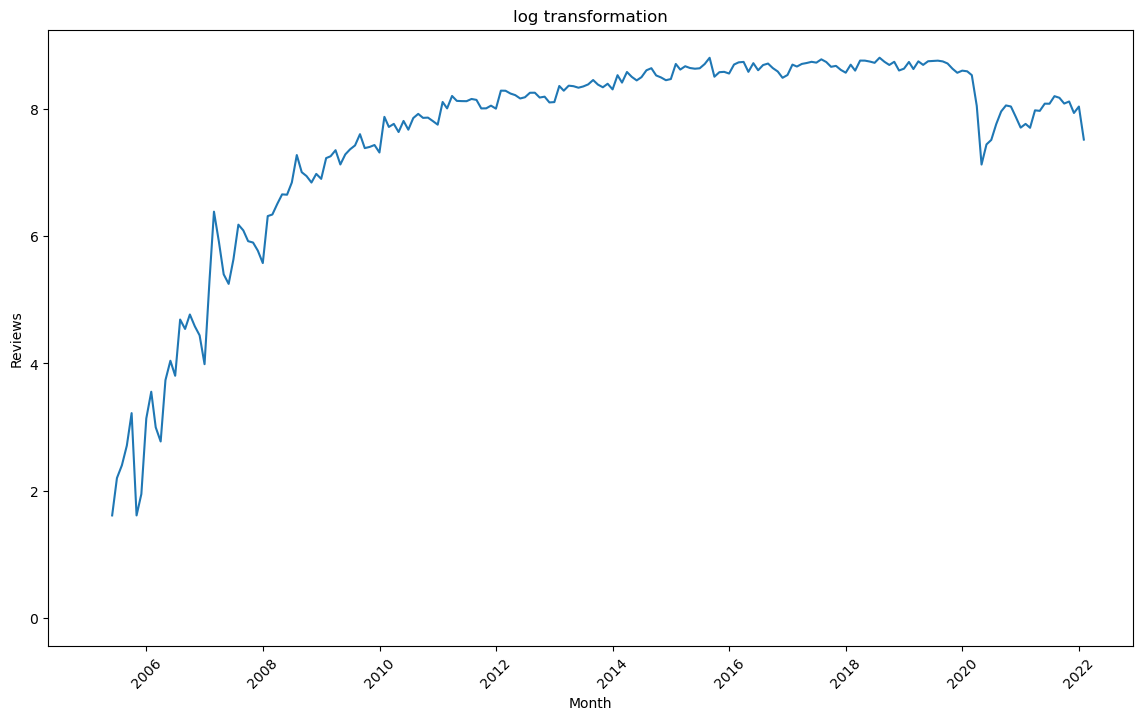

In [33]:
#plot log transformation
plt.figure(figsize=(14, 8))
plt.plot(monthly_reviews['date'], np.log(monthly_reviews['count']))  
plt.xlabel('Month')
plt.ylabel('Reviews')
plt.title('log transformation')
plt.xticks(rotation=45)
plt.show()

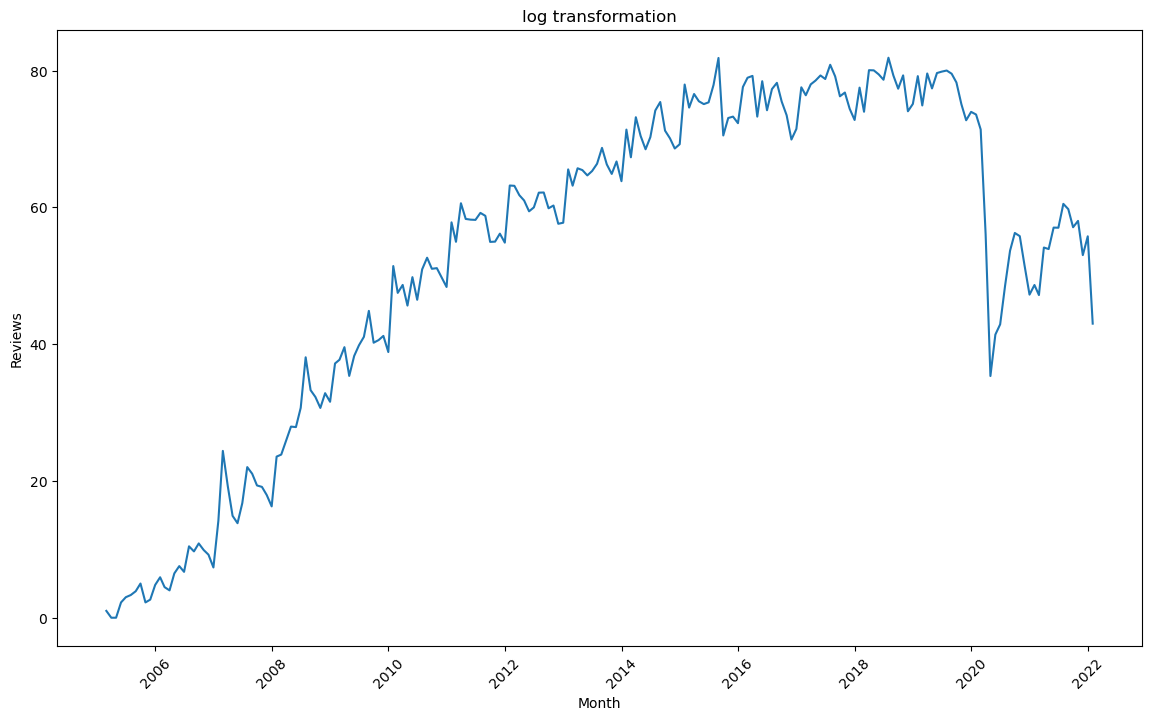

In [34]:
#plot sqrt transformation
plt.figure(figsize=(14, 8))
plt.plot(monthly_reviews['date'], np.sqrt(monthly_reviews['count']))  
plt.xlabel('Month')
plt.ylabel('Reviews')
plt.title('log transformation')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#WE WILL NEED TO TRANSFORM THE TIMESERIE TO STATIONARY DEPENDING ON THE CHOSEN TIMESERIE

In [ ]:
#plot sqrt transformation
plt.figure(figsize=(14, 8))
plt.plot(monthly_reviews['date'], np.sqrt(monthly_reviews['count']))  
plt.xlabel('Month')
plt.ylabel('Reviews')
plt.title('log transformation')
plt.xticks(rotation=45)
plt.show()

In [61]:
monthly_reviews.iloc[183]

date       2020-05-31 00:00:00
count                     1714
quarter                      2
year                      2020
Name: 183, dtype: object

# Modelling

In [68]:
# train test split
test_date = '2020-10-31'
target = 'count'

ts_train = monthly_reviews[monthly_reviews['date'] <= test_date][['date', target]]
ts_test = monthly_reviews[monthly_reviews['date'] > test_date][['date', target]]

count_train = ts_train[target].values
count_test = ts_test[target].values

horizon = len(ts_test)

In [69]:
ts_test

,date,count
189,2020-11-30,2651
190,2020-12-31,2232
191,2021-01-31,2367
192,2021-02-28,2226
193,2021-03-31,2930
194,2021-04-30,2906
195,2021-05-31,3254
196,2021-06-30,3252
197,2021-07-31,3662
198,2021-08-31,3569


In [73]:
# MODEL 1
from statsforecast.models import HistoricAverage

model = HistoricAverage()
model = model.fit(y=count_train)

mean = model.predict(h=horizon)
mean

{'mean': array([3406.5767, 3406.5767, 3406.5767, 3406.5767, 3406.5767, 3406.5767,
        3406.5767, 3406.5767, 3406.5767, 3406.5767, 3406.5767, 3406.5767,
        3406.5767, 3406.5767, 3406.5767], dtype=float32)}

In [74]:
# add the predictions to the dataframe
ts_test['mean_forecast'] = mean['mean']

In [80]:
#MODEL 2
from statsforecast.models import ETS

ets = ETS(model='ZAZ') #ZMZ does not work
ets = ets.fit(y=count_train)

y_hat_ets = ets.predict(h=horizon)
y_hat_ets

{'mean': array([3129.84208652, 3146.10725976, 3162.372433  , 3178.63760624,
        3194.90277948, 3211.16795272, 3227.43312595, 3243.69829919,
        3259.96347243, 3276.22864567, 3292.49381891, 3308.75899215,
        3325.02416539, 3341.28933863, 3357.55451187])}

In [81]:
# add the predictions to the dataframe
ts_test['ets_forecast'] = y_hat_ets['mean']

In [82]:
#MODEL 3 = ARIMA
from statsforecast.models import AutoARIMA

arima = AutoARIMA(trace=True)
arima = arima.fit(y=count_train)

y_hat_arima = arima.predict(h=horizon, level=[80, 95])
y_hat_arima


ARIMA(2,1,2)                   :2818.386307106973

ARIMA(0,1,0)                   :2819.223540240948

ARIMA(1,1,0)                   :2814.097158859984

ARIMA(0,1,1)                   :2814.502687138962

ARIMA(2,1,0)                   :2815.8968371021733

ARIMA(1,1,1)                   :2815.8479359649814

ARIMA(2,1,1)                   :2817.918446089714
Now re-fitting the best model(s) without approximations...


ARIMA(1,1,0)                   :2814.097158859984


{'mean': array([3122.3207094 , 3120.65002433, 3120.94948529, 3120.89580858,
        3120.90542983, 3120.90370528, 3120.90401439, 3120.90395899,
        3120.90396892, 3120.90396714, 3120.90396746, 3120.9039674 ,
        3120.90396741, 3120.90396741, 3120.90396741]),
 'lo-95': 0     2282.901273
 1     2034.699573
 2     1820.241750
 3     1638.500964
 4     1476.405082
 5     1328.964202
 6     1192.756560
 7     1065.557048
 8      945.783164
 9      832.269029
 10     724.125028
 11     620.654244
 12     521.298597
 13     425.602968
 14     333.190410
 Name: 95%, dtype: float64,
 'lo-80': 0     2573.453842
 1     2410.585190
 2     2270.462411
 3     2151.609919
 4     2045.624449
 5     1949.217443
 6     1860.156160
 7     1776.984850
 8     1698.668920
 9     1624.446016
 10    1553.734455
 11    1486.078546
 12    1421.113380
 13    1358.541372
 14    1298.116048
 Name: 80%, dtype: float64,
 'hi-80': 0     3671.187577
 1     3830.714858
 2     3971.436559
 3     4090.181698
 4  

In [89]:
ts_test['arima_forecast'] = y_hat_arima['mean']

In [ ]:
# TEST OTHER MODELS IN THE FUTURE

In [90]:
#PLOT FORECASTS
def visualize(train, test, title):
    fig, ax = plt.subplots(1, 1, figsize = (20, 8))

    # Concatenate the dataframe of predicted values with the dataframe of observed values:
    plot_df = pd.concat([train, test]).set_index('date')
    plot_df.plot(ax=ax, linewidth=2)

    # Specify graph features:
    ax.set_title(title, fontsize=22)
    ax.set_ylabel('reviews', fontsize=20)
    ax.set_xlabel('date', fontsize=20)
    ax.legend(prop={'size': 15})
    ax.grid()

    # vertical line to indicate the split between train and test
    plt.axvline(x=test_date, color='red', linestyle='--', lw=1)

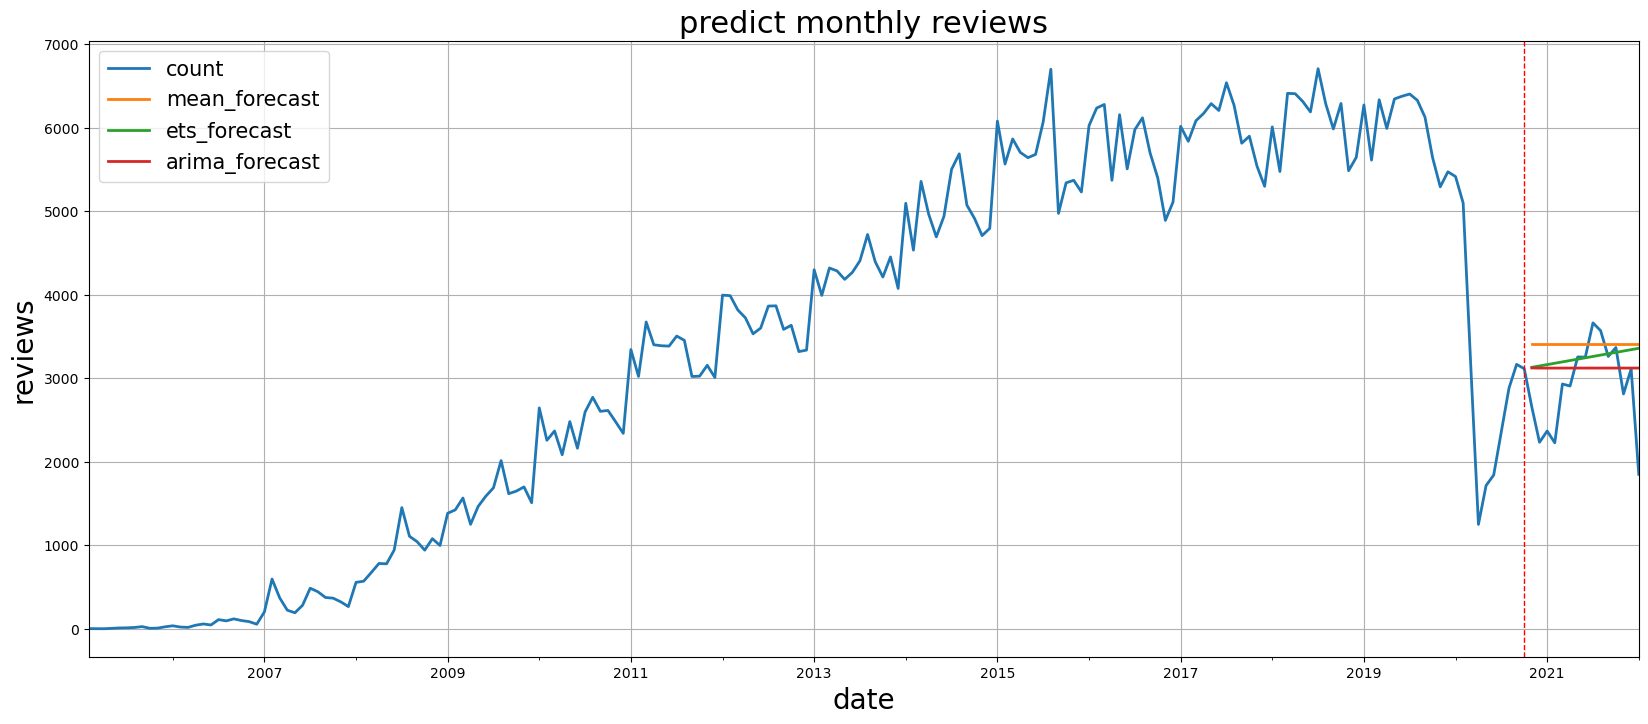

In [91]:
visualize(ts_train[['date', target]], ts_test, 'predict monthly reviews')

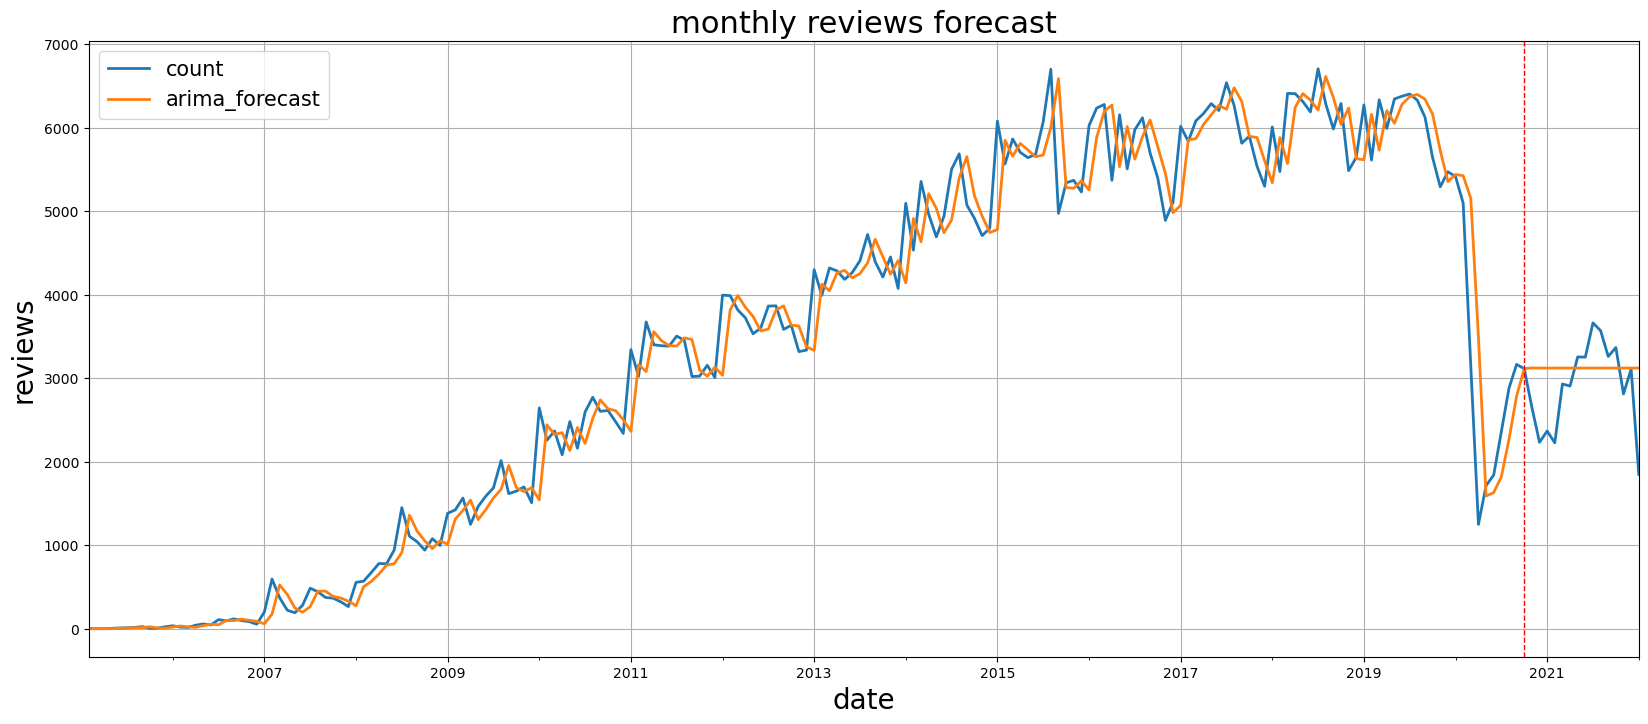

In [96]:
# get the fitted values for the model
viz_forecasting = 'arima_forecast'
fitted_values = arima.predict_in_sample()['fitted']
# add the fitted values to the training dataframe
ts_train[viz_forecasting] = fitted_values

#visualize
visualize(ts_train[['date', target, viz_forecasting]], ts_test[['date', target, viz_forecasting]], 'monthly reviews forecast')

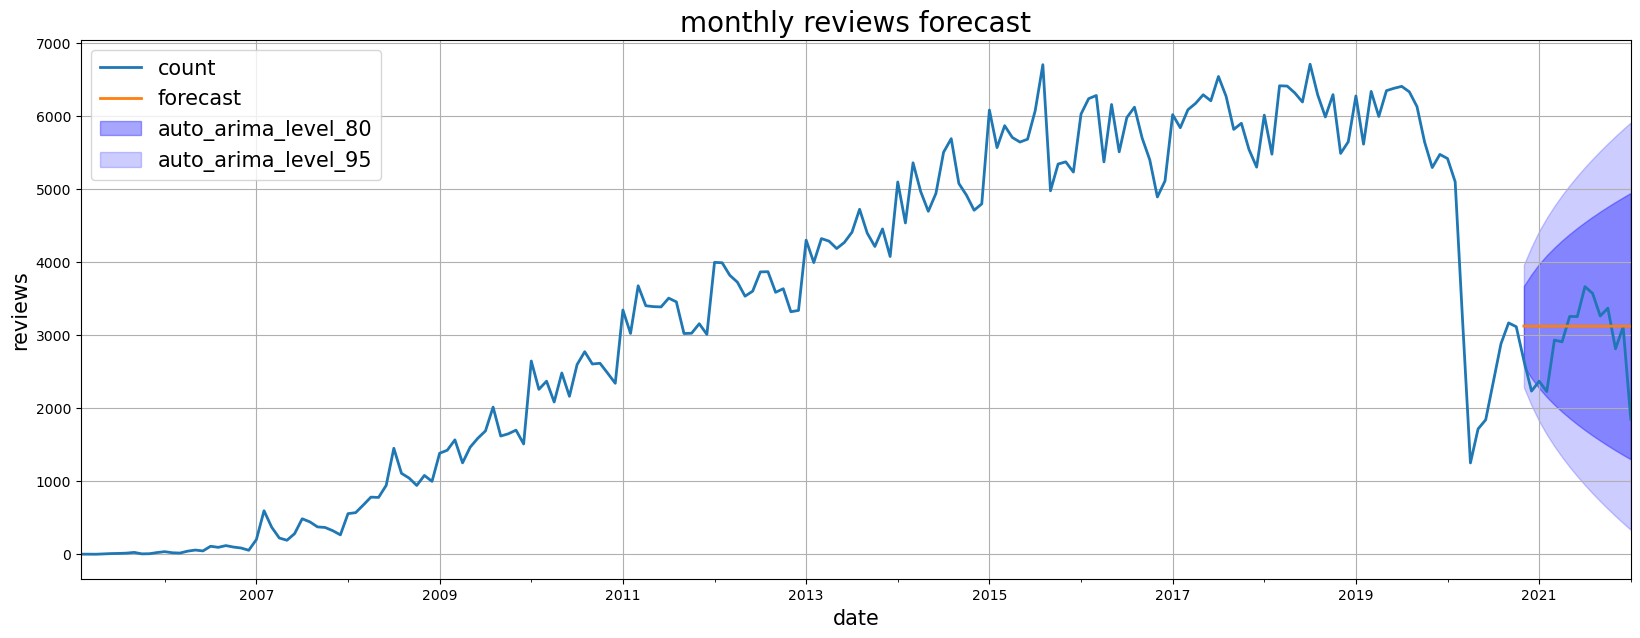

In [97]:
# Concatenate the dataframe of predicted values with the dataframe of observed values:
df_arima_test = pd.concat([ts_test.reset_index()[["date", "count"]], pd.DataFrame(y_hat_arima)], axis=1)
df_arima_test = df_arima_test.rename(columns={"mean": "forecast"})
df_plot = pd.concat([ts_train[['date', target]], df_arima_test]).set_index('date')

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot[['count', 'forecast']].plot(ax=ax, linewidth=2)
# Specify graph features:
ax.fill_between(df_plot.index, 
                df_plot['lo-80'], 
                df_plot['hi-80'],
                alpha=.35,
                color='blue',
                label='auto_arima_level_80')
ax.fill_between(df_plot.index, 
                df_plot['lo-95'], 
                df_plot['hi-95'],
                alpha=.2,
                color='blue',
                label='auto_arima_level_95')
ax.set_title('monthly reviews forecast', fontsize=20)
ax.set_ylabel('reviews', fontsize=15)
ax.set_xlabel('date', fontsize=15)
ax.legend(prop={'size': 15})
ax.grid()

In [99]:
# make sure this dataset contains the arima fitted values
residuals = ts_train[target] - ts_train["arima_forecast"]
ts_train['arima_residuals'] = residuals

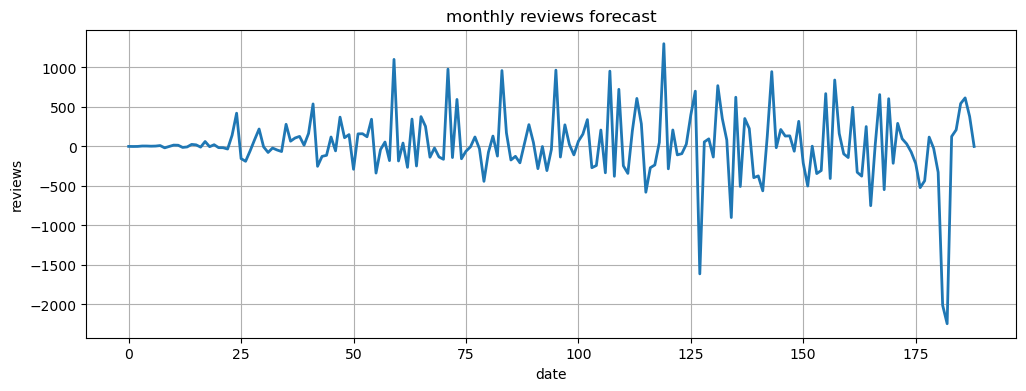

In [100]:
# plot the residuals
fig, ax = plt.subplots(1, 1, figsize = (12, 4))
ts_train['arima_residuals'].plot(ax=ax, linewidth=2)

ax.set_title('monthly reviews forecast')
ax.set_ylabel('reviews')
ax.set_xlabel('date')
ax.grid()

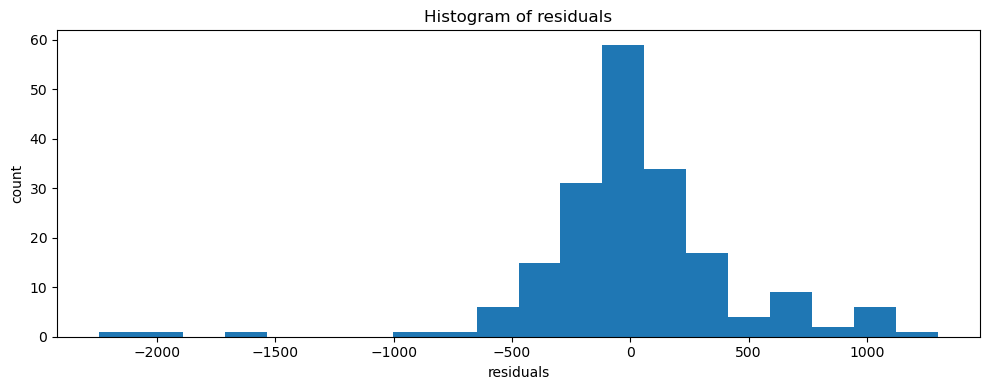

In [102]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 4),
                        tight_layout = True)
 
axs.hist(ts_train['arima_residuals'], bins = 20)

axs.set_title('Histogram of residuals')
axs.set_ylabel('count')
axs.set_xlabel('residuals');

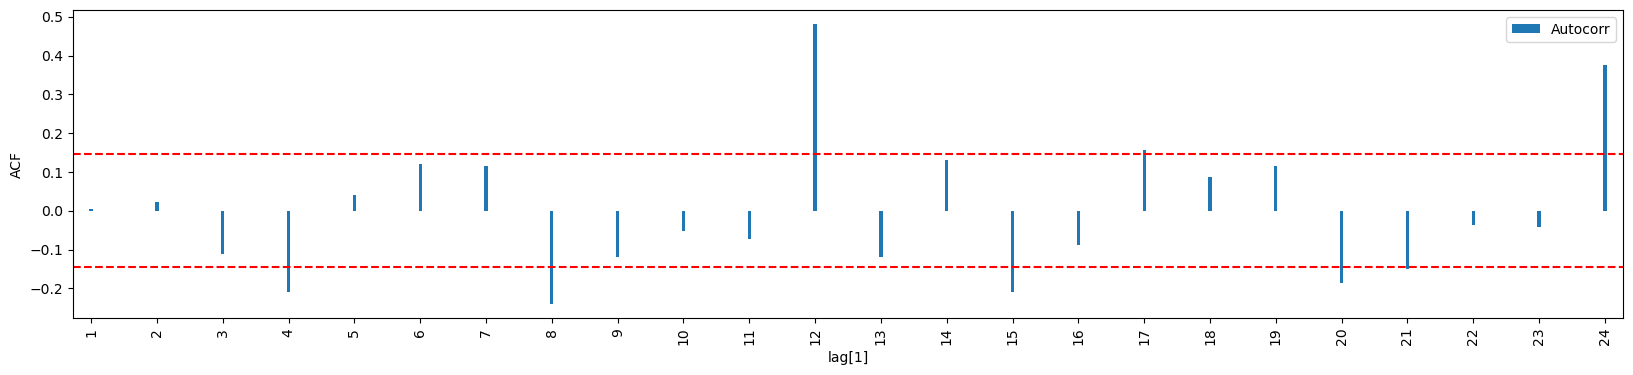

In [104]:
import math

ticker_data = ts_train['arima_residuals']
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(ts_train['arima_residuals'])
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')
 
# axis names
plt.xlabel("lag[1]")
plt.ylabel("ACF");